# CREDIT CARD FRAUD DETECTION

## OVERVIEW

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. But we have shown confusion matrix for all the models run.

Evaluation Metrics:

Use the confusionmatrix to calculate Precision, Recall
F1score (weighted average of precision recall)
ROC curves - calculates sensitivity/specificity ratio.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#loading data
data = pd.read_csv("C:/Users/Ramkumar/Documents/Fall 17 subjects/ML/Project 3/fraud_data.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing

The data contains PCA features except 'Time' and 'Amount' variable. As the Time variable is insignifcant we have dropped the 'Time' variable and standarized the 'Amount' column as a part of data preprocessing.

As the 'Class' variable is highly imbalanced, We have used a technique called SMOTE. Synthetic Minority Oversampling TEchnique (SMOTE) is a very popular oversampling method that was proposed to improve random oversampling but its behavior on high-dimensional data.  The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. Our implementation currently uses five nearest neighbors. For instance, if the amount of over-sampling needed is 200%, only two neighbors from the five nearest neighbors are chosen and one sample is generated in the direction of each. Synthetic samples are generated in the following way: Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration. This causes the selection of a random point along the line segment between two specific features. This approach effectively forces the decision region of the minority class to become more general.

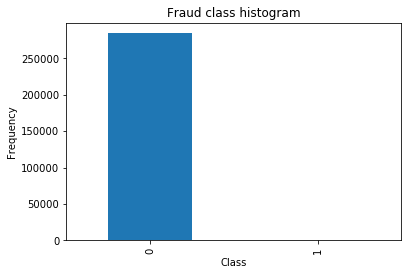

In [3]:
#frequency plot
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

C:\Users\Ramkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [6]:
labels = data['Class']
features = data.drop(['Class'], axis=1)

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [8]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)
len(os_labels[os_labels==0])

227454

# Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. We run the randomforest model after spilting the fraud data into test and train after implementing SMOTE.

In [9]:
clf=RandomForestClassifier(random_state=0)
clf.fit(os_features,os_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
# perform predictions on test set
actual=labels_test
predictions=clf.predict(features_test)

In [11]:
matrix_rfc = confusion_matrix(actual,predictions)
matrix_rfc

array([[56850,    11],
       [   17,    84]], dtype=int64)

# Confusion Matrix

For problems, where the number of TP is very small in comparison with the number of TN, the Confusion Matrix is less useful, since it is important to use a metric that include evaluation of FP and FN as well. It is important to minimize as much as possible the number of FN (Predicted: Not Fraud and True: Fraud) since their cost could be very large. Typically AUC is used for such cases.


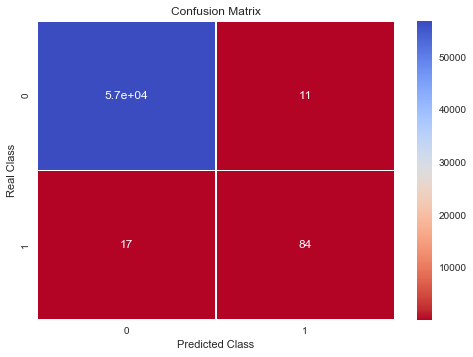

In [12]:
#heatmap of the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix_rfc, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

# Evaluation: Recall is the best measure

As the target variable is very much imbalanced, the accuracy becomes the least effective measure here. For this kind of dataset where correctly predicting the people who default is the important measure. Hence we use Recall parameter to evaluate it. 

We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:
* Accuracy = (TP+TN)/total
* Precision = TP/(TP+FP)
* Recall = TP/(TP+FN)

As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.From below, we can see that recall is 80.19% and precision is 93.10%. 

The AUC is 92%

In [13]:
def get_accuracy_recall_and_precision():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.ensemble import RandomForestClassifier  
    rfc=RandomForestClassifier()
    rfc.fit(features_train, labels_train)
    y_pred=rfc.predict(features_test)
    acc=rfc.score(features_test, labels_test)
    rc=recall_score(labels_test, y_pred)
    pc=precision_score(labels_test, y_pred)
    return (acc,rc,pc)
accuracy, recall, precision = get_accuracy_recall_and_precision()
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)

Accuracy:  0.999543555353
Recall:  0.80198019802
Precision: 0.931034482759


In [14]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.915744857052


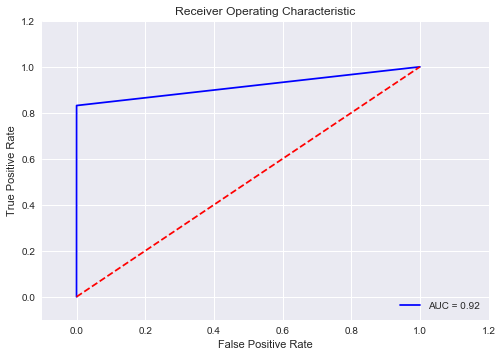

In [15]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# NAIVE BAYES

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

Naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score


In [56]:
def get_predictions(clf, features_train, labels_train, feaures_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(features_train,labels_train)
    # predict using test data
    y_pred = clf.predict(features_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(features_test)
    #train-set predictions
    train_pred = clf.predict(features_train)
    print('train-set confusion matrix:\n', confusion_matrix(labels_train,train_pred)) 
    return y_pred, y_pred_prob

In [57]:
def print_scores(labels_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(labels_test,y_pred)) 
    print("recall score: ", recall_score(labels_test,y_pred))
    print("precision score: ", precision_score(labels_test,y_pred))
    print("f1 score: ", f1_score(labels_test,y_pred))
    print("accuracy score: ", accuracy_score(labels_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(labels_test, y_pred_prob[:,1])))

The AUC and Recall score is found to be 96.79%, 85.14% respectively which is better than the RandomForest Classifier

In [25]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), features_train, labels_train, features_test)
print_scores(labels_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[222400   5054]
 [    69    322]]
test-set confusion matrix:
 [[55642  1219]
 [   15    86]]
recall score:  0.851485148515
precision score:  0.0659003831418
f1 score:  0.122332859175
accuracy score:  0.978336434816
ROC AUC: 0.9679099335691118


# XGBOOST 

XGBoost is short for “Extreme Gradient Boosting”, where the term “Gradient Boosting” is proposed in the paper Greedy Function Approximation. We define a objective function for the model and try to continuallly optimize it

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# fit model no training data
model = XGBClassifier()
model.fit(features_train, labels_train)
# make predictions for test data
y_xgbpred = model.predict(features_test)
predictions = [round(value) for value in y_xgbpred]
# evaluate predictions
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.94%


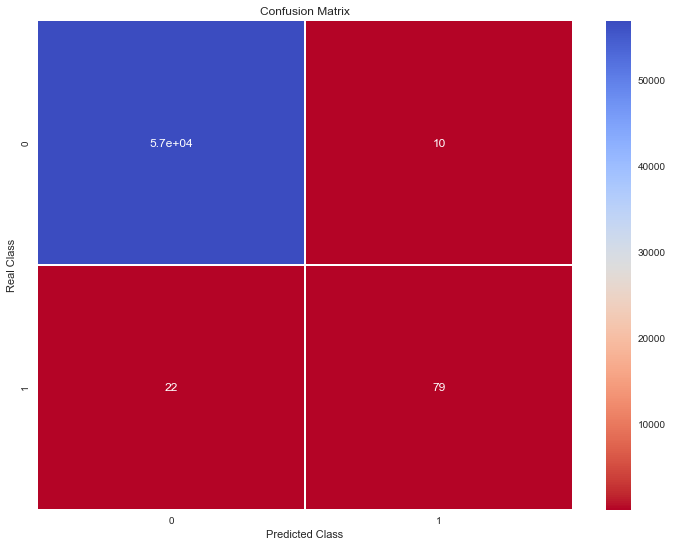

In [44]:
actual_xgb = labels_test
matrix_xgb = confusion_matrix(actual_xgb,predictions)
#heatmap of the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix_xgb, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [37]:
# XGBoost CV model
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(model, features, labels, cv=kfold, scoring = scoring)
print(("AUC: %.3f") % (results.mean()))

AUC: 0.980


From the above results our algorithm achieved auc-roc (i.e. area under the precision-recall curve) score of 0.980. The auc-roc curve in insensitive to class imbalanace and hence is the preferred evaluation metric for estimating the performance of our learning function.


# Linear Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.
Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

In [49]:
from sklearn.svm import LinearSVC
# fit model no training data
model = LinearSVC()
model.fit(features_train, labels_train)
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0)

clf = LinearSVC().fit(features_train, labels_train)
# make predictions for test data
y_svcpred = model.predict(features_test)
predictions_svc = [round(value) for value in y_svcpred]
# evaluate predictions
accuracy = accuracy_score(labels_test, predictions_svc)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#print('Accuracy of Linear SVC classifier on training set: {:.2f}'
    # .format(clf.score(features_train, labels_train)))
#print('Accuracy of Linear SVC classifier on test set: {:.2f}'
    # .format(clf.score(features_test, labels_test)))

Accuracy: 99.91%


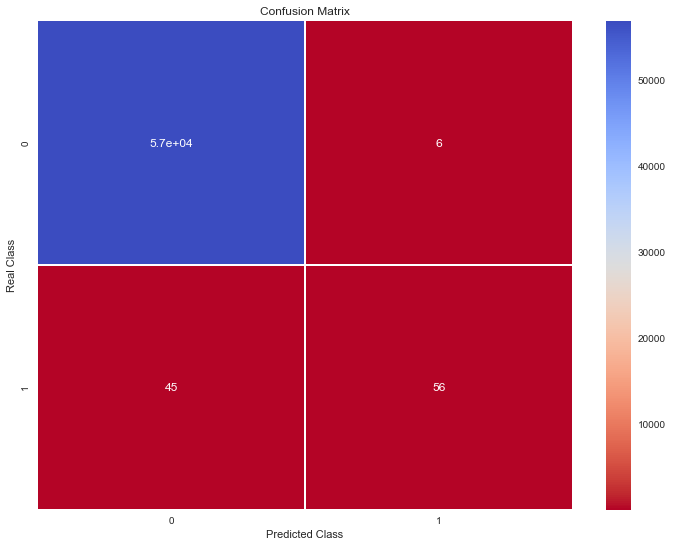

In [50]:

actual_svc = labels_test
matrix_svc = confusion_matrix(actual_xgb,predictions_svc)
#heatmap of the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix_svc, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

# Principal Component Analysis

Principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.

Importantly, the dataset on which PCA technique is to be used must be scaled. The results are also sensitive to the relative scaling.


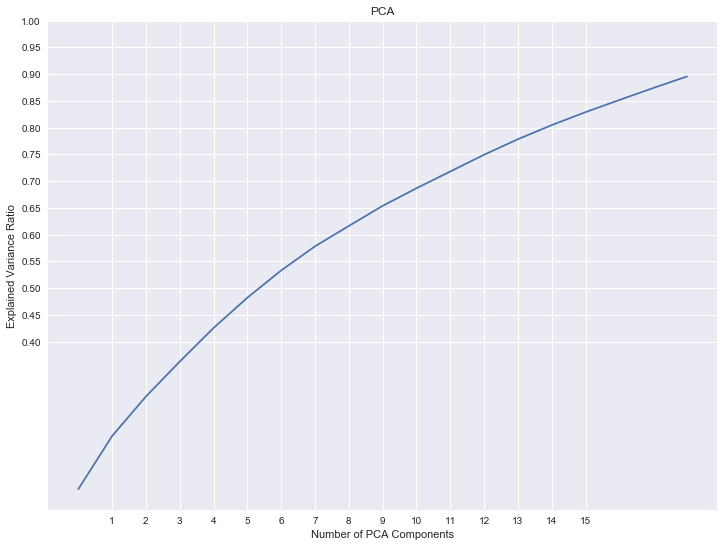

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
var_explain = []
for i in range(1,20):
    pca = PCA(n_components= i)
    x_pca = pca.fit_transform(features)
    var_explain.append(np.sum(pca.explained_variance_ratio_))

plt.plot(var_explain[:])
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA')
plt.yticks(np.arange(.4,1.05,.05))
plt.xticks(np.arange(1,16,1))
plt.show()


Using PCA technique we have manaaged to cut down the number of features from 28 to 20 variables and thereby retaining 90% of the variation in the data and increasing the predicition accuracy.  

# Voting Classifier for Randomforest and Support vector machines

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#NB_clf = GaussianNB(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(features_train, labels_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [66]:
from sklearn.metrics import accuracy_score

for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(features_train, labels_train)
    y_pred_voting = clf.predict(features_test)
    print(clf.__class__.__name__, accuracy_score(labels_test, y_pred_voting))

RandomForestClassifier 0.999490888663
SVC 0.999297777466
VotingClassifier 0.999245110776


# Voting Classifier for KNN, Decisiontree, Logistic regression

In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

LR_clf = LogisticRegression(random_state=42)
#KNN_clf = KNeighborsRegressor(random_state=42)
DT_clf = DecisionTreeClassifier(random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', LR_clf), ('DT', DT_clf)], voting='hard')
voting_clf.fit(features_train, labels_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', DecisionT...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [70]:
from sklearn.metrics import accuracy_score

for clf in (LR_clf, DT_clf, voting_clf):
    clf.fit(features_train, labels_train)
    y_pred_voting = clf.predict(features_test)
    print(clf.__class__.__name__, accuracy_score(labels_test, y_pred_voting))

LogisticRegression 0.999192444086
DecisionTreeClassifier 0.999245110776
VotingClassifier 0.999280221902


The Highest Accuracy improvement can be shown from RandomForest Classifier which is 99.94% from 99.90%